<a href="https://colab.research.google.com/github/DataMiaoWH/DeepLearningExamples/blob/master/Assignments/assignment_10_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# IS4487 Week 10 - Assignment

### Outline

Our Goals with this Project:

1. Import and review the data
2. Perform EDA and Clean Data
3. Fit a model
4. Test the accuracy of the model
6.  Use the model to predict on a new dataset (without the target)

<a href="https://colab.research.google.com/github/Stan-Pugsley/is_4487_base/blob/main/Assignments/assignment_10_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Business Case: AdviseInvest
You work on a small team of data analysts at AdviseInvest, a venture-backed startup. The Director of Sales at AdviseInvest has approached your team asking for help solving a staffing problem.

### The Company
The company's mission is to provide tools and support to help ordinary people gain control of their personal finances. The company leverages technology to provide affordable financial advice to a national client base.

Customers who reach AdviseInvest's website go through five steps:

- Open an account.
- Complete a customer profile form with basic information about their background and finances.
- Schedule a free phone conversation with a sales representative during a 1-hour window of time.
- Attend the free phone conversation.
- Buy a financial plan.
- There are three types of financial plans: Beginner, Intermediate, and Advanced. Each is sold at a different price, and there are varying degrees of personalization. After a customer purchases a financial plan, the customer is assigned a financial planner who helps determine the customer's goals and advises the customer on spending decisions.

### The Problem
Some customers are lost at each stage of the process. Steps 3 and 4 are particularly challenging because approximately 50% of those who schedule a phone conversation fail to pick up the call. This leads to inefficiencies from a staffing perspective.

AdviseInvest has 4 sales reps on staff during each particular 1-hour window. Each of the 4 reps is assigned 2 prospective customers per hour, which means that the company schedules a total of 8 phone calls per hour. The calls are outgoing: sales reps call customers who scheduled a phone conversation during that hour window.

Unfortunately, as noted above, many of the customers who scheduled a call do not answer. As a consequence, sales reps are often left underutilized. Moreover, they are underutilized unevenly. For example, it is possible that one sales rep will not do any sales calls during that hour, whereas another will be busy the entire hour with two calls. Sales reps have nothing to do when customers do not answer the scheduled phone call.

### AdviseInvest Data Dictionary


| Variable | Description | Type | Code |
|:---|:---|:---|:---|
| Answered | Customer response | Binary | 0: customer did not answer scheduled call; 1: customer answered scheduled call |
| Income | Customer income in US dollars | Numeric | |
| Female | Customer gender | Binary | 0: female; 1: male |
| Age | Age in years | Numeric | |
| Job | Nature of job | Categorical | 0 : unemployed; 1 : entry level position; 2 : midlevel position; 3 : management/ self-employed/ highly qualified employee/ officer |
| Num_dependents | Number of people for whom the customer provides maintenance | Numeric | |
| Rent | Customer rents | Binary | 0: no; 1: yes |
| Own_res | Customer owns residence | Binary | 0: no; 1: yes |
| New_car | Recent new car purchase | Binary | New car purchase in the last 3 months: 0: no, 1: yes |
| Chk_acct | Checking account status | Categorical | 0 : no checking account; 1: checking < 200 USD; 2 : 200 < checking < 2000 USD; 3: 2000 < checking < 35000 USD; 4: >= 3500 USD |
| Sav_acct | Average balance in savings account | Categorical | 0 : no savings account; 1 : 100 <= savings < 500 USD; 2 : 500 <= savings < 2000 USD; 3 : 2000 < savings < 35000 USD; 4: >= 3500 USD |
| Num_accts | Number of accounts owned by customer | Numeric | |
| Mobile | Mobile phone | Binary | 0: customer provided non‐mobile phone for follow‐up call; 1: customer provided mobile phone for follow‐up call |
| Product | Type of product purchased after conversation with sales rep | Categorical | 0: customer did not answer call; 1: customer answered but did not purchase a product; 2: customer answered and purchased Beginner plan; 3: customer answered and purchased Intermediate plan; 4: customer answered and purchased Advanced plan |

### Load Libraries

Import the libraries you will need, such as:
- Pandas
- Sklearn
- Matplotlib


In [15]:
#Import libraries  🔧
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import warnings
warnings.filterwarnings('ignore')

## Step 1: Initial Data Understanding

### Do the following:
 - Import data from the AdviseInvest historical dataset into a dataframe (in GitHub go to Assignments > DataSets)
 - Describe or profile the dataframe
 - Look for any outliers, missing values, or duplicates

In [16]:
#Import the data 🔧
# Import the data
df = pd.read_csv('sample_data/adviseinvest_historical_data.csv')

# Display first few rows
print("First 5 rows of the dataset:")
df.head()

First 5 rows of the dataset:


,answered,income,female,age,job,num_dependents,rent,own_res,new_car,chk_acct,sav_acct,num_accts,mobile,product
0,1,13520,0,23,0,1,1,0,0.0,0,2,0,1,2
1,0,14780,0,22,2,1,0,1,0.0,3,0,3,0,0
2,1,37570,0,62,2,1,0,0,1.0,3,0,4,0,4
3,0,12450,0,33,2,1,0,1,0.0,1,0,2,0,0
4,0,12400,0,48,1,2,0,0,1.0,2,1,4,0,0


In [17]:
#View the datatypes 🔧
print("Data types and info:")
df.info()

Data types and info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29504 entries, 0 to 29503
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   answered        29504 non-null  int64  
 1   income          29504 non-null  int64  
 2   female          29504 non-null  object 
 3   age             29504 non-null  int64  
 4   job             29504 non-null  int64  
 5   num_dependents  29504 non-null  int64  
 6   rent            29504 non-null  int64  
 7   own_res         29504 non-null  int64  
 8   new_car         29502 non-null  float64
 9   chk_acct        29504 non-null  int64  
 10  sav_acct        29504 non-null  int64  
 11  num_accts       29504 non-null  int64  
 12  mobile          29504 non-null  int64  
 13  product         29504 non-null  int64  
dtypes: float64(1), int64(12), object(1)
memory usage: 3.2+ MB


In [18]:
#Describe the data 🔧
# Describe the data
print("Statistical summary:")
df.describe()

Statistical summary:


,answered,income,age,job,num_dependents,rent,own_res,new_car,chk_acct,sav_acct,num_accts,mobile,product
count,29504.000000,29504.000000,29504.000000,29504.000000,29504.000000,29504.000000,29504.000000,29502.000000,29504.000000,29504.000000,29504.000000,29504.000000,29504.000000
mean,0.546638,33766.893303,34.773454,1.915401,1.140998,0.210412,0.681128,0.240797,1.468547,0.956616,2.458345,0.091106,1.535792
std,0.497829,29379.202710,11.369865,0.658183,0.348025,0.407608,0.466047,0.427575,1.234727,1.483946,19.497380,0.287765,1.625916
min,0.000000,-65600.000000,19.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,13550.000000,26.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000
50%,1.000000,23310.000000,32.000000,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,2.000000,0.000000,1.000000
75%,1.000000,41690.000000,40.000000,2.000000,1.000000,0.000000,1.000000,0.000000,3.000000,2.000000,3.000000,0.000000,3.000000
max,1.000000,159450.000000,132.000000,3.000000,2.000000,1.000000,1.000000,1.000000,3.000000,4.000000,3345.000000,1.000000,4.000000


## Step 2: Data Preparation

### 2.1: Data Cleanup
- Remove any variables that are not relevant to our analysis (be sure not to delete too many variables, you may need them in the near future!)
- Clean up the data and put it in a new datafram named "df_clean"


In [35]:
#delete outliers 🔧
# Check for outliers in income and age
print("Income range:", df['income'].min(), "-", df['income'].max())
print("Age range:", df['age'].min(), "-", df['age'].max())

# Remove any extreme outliers if necessary
df_clean = df.copy()

Income range: -65600 - 159450
Age range: 19 - 132


In [36]:
#remove variables that are not helpful 🔧
df_clean = df_clean.drop(columns=['product'])

print("Remaining columns:")
print(df_clean.columns.tolist())

Remaining columns:
['answered', 'income', 'female', 'age', 'job', 'num_dependents', 'rent', 'own_res', 'new_car', 'chk_acct', 'sav_acct', 'num_accts', 'mobile']


In [37]:
#cleanup any missing or non-standardized data 🔧
# Remove rows with missing values in new_car
df_clean = df_clean.dropna(subset=['new_car'])

print(f"\nRows after cleaning: {len(df_clean)}")


Rows after cleaning: 29502


### 2.2: Standardize variables

 - Change "answered" to yes/no and make it categorical
 - Convert any variables that should be an integer into an integer

In [38]:
# Convert answered to categorical 🔧
df_clean['answered_cat'] = df_clean['answered'].map({0: 'No', 1: 'Yes'})
df_clean['answered_cat'] = df_clean['answered_cat'].astype('category')

print("Answered distribution:")
print(df_clean['answered_cat'].value_counts())

Answered distribution:
answered_cat
Yes    16126
No     13376
Name: count, dtype: int64


In [39]:
# Convert variables to integer data type 🔧
df_clean = df_clean[df_clean['female'] != 'M']
df_clean['female'] = df_clean['female'].astype(int)

df_clean['num_dependents'] = df_clean['num_dependents'].astype(int)

df_clean['new_car'] = df_clean['new_car'].astype(int)

### 2.3 Convert variables to categorical

- Find at least 8 variables that would be appropriate to convert to categories

In [41]:
#Convert categorical variables 🔧
categorical_vars = ['answered', 'female', 'job', 'rent', 'own_res',
                   'new_car', 'chk_acct', 'sav_acct', 'mobile']

for var in categorical_vars:
    df_clean[f'{var}_cat'] = df_clean[var].astype('category')

print("Categorical variables created:")
print([col for col in df_clean.columns if col.endswith('_cat')])

Categorical variables created:
['answered_cat', 'female_cat', 'job_cat', 'rent_cat', 'own_res_cat', 'new_car_cat', 'chk_acct_cat', 'sav_acct_cat', 'mobile_cat']


# Step 3: Exploratory Data Analysis (EDA)

### Do the following:
- Explore the relationships between the target and independent variables
- Create at least five charts to show the relationships, using different chart types that are approriate to the analysis
- Ensure that all charts are clearly labeled and formatted



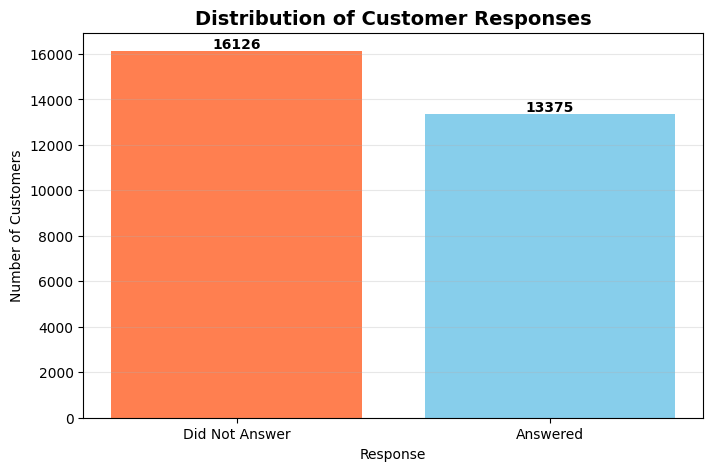

In [42]:
# Chart 1 🔧
# Chart 1: Distribution of Answered
plt.figure(figsize=(8, 5))
answered_counts = df_clean['answered'].value_counts()
plt.bar(['Did Not Answer', 'Answered'], answered_counts.values, color=['coral', 'skyblue'])
plt.title('Distribution of Customer Responses', fontsize=14, fontweight='bold')
plt.xlabel('Response')
plt.ylabel('Number of Customers')
plt.grid(axis='y', alpha=0.3)
for i, v in enumerate(answered_counts.values):
    plt.text(i, v + 100, str(v), ha='center', fontweight='bold')
plt.show()

<Figure size 1000x600 with 0 Axes>

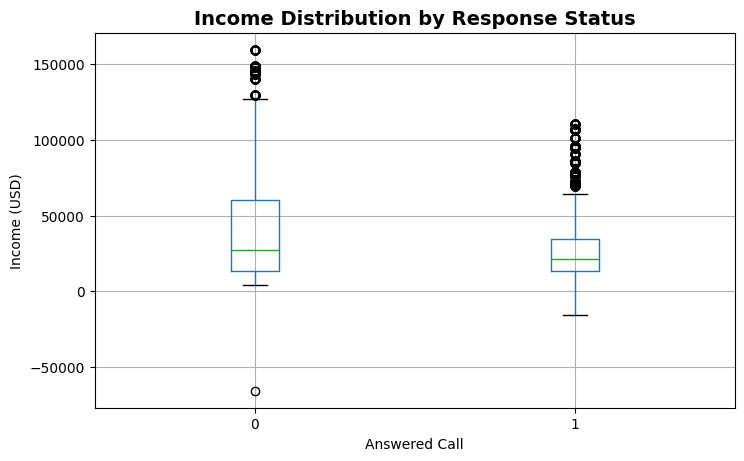

In [43]:
# Chart 2 🔧
# Chart 2: Income vs Answered
plt.figure(figsize=(10, 6))
df_clean.boxplot(column='income', by='answered_cat', figsize=(8, 5))
plt.title('Income Distribution by Response Status', fontsize=14, fontweight='bold')
plt.suptitle('')
plt.xlabel('Answered Call')
plt.ylabel('Income (USD)')
plt.show()

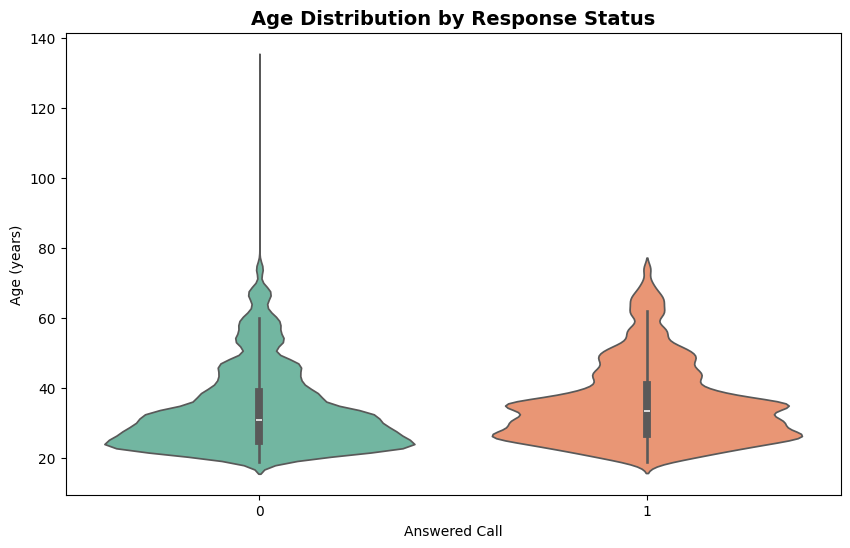

In [44]:
# Chart 3 🔧
# Chart 3: Age vs Answered
plt.figure(figsize=(10, 6))
sns.violinplot(data=df_clean, x='answered_cat', y='age', palette='Set2')
plt.title('Age Distribution by Response Status', fontsize=14, fontweight='bold')
plt.xlabel('Answered Call')
plt.ylabel('Age (years)')
plt.show()

<Figure size 800x500 with 0 Axes>

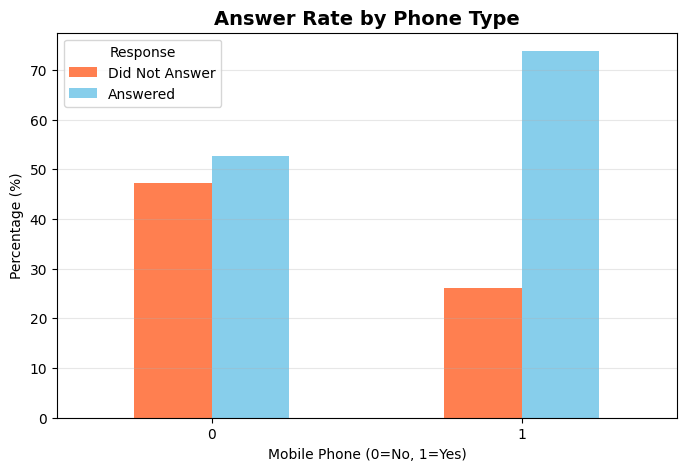

In [45]:
# Chart 4 🔧
# Chart 4: Mobile Phone vs Answered
plt.figure(figsize=(8, 5))
mobile_answered = pd.crosstab(df_clean['mobile'], df_clean['answered'], normalize='index') * 100
mobile_answered.plot(kind='bar', color=['coral', 'skyblue'], figsize=(8, 5))
plt.title('Answer Rate by Phone Type', fontsize=14, fontweight='bold')
plt.xlabel('Mobile Phone (0=No, 1=Yes)')
plt.ylabel('Percentage (%)')
plt.legend(['Did Not Answer', 'Answered'], title='Response')
plt.xticks(rotation=0)
plt.grid(axis='y', alpha=0.3)
plt.show()

<Figure size 1000x600 with 0 Axes>

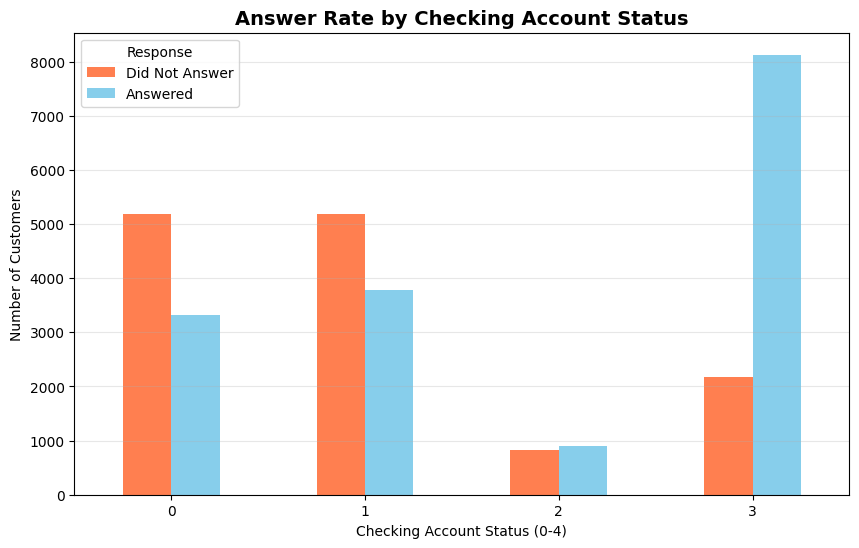

In [46]:
# Chart 5 🔧
# Chart 5: Checking Account Status vs Answered
plt.figure(figsize=(10, 6))
chk_answered = pd.crosstab(df_clean['chk_acct'], df_clean['answered'])
chk_answered.plot(kind='bar', stacked=False, color=['coral', 'skyblue'], figsize=(10, 6))
plt.title('Answer Rate by Checking Account Status', fontsize=14, fontweight='bold')
plt.xlabel('Checking Account Status (0-4)')
plt.ylabel('Number of Customers')
plt.legend(['Did Not Answer', 'Answered'], title='Response')
plt.xticks(rotation=0)
plt.grid(axis='y', alpha=0.3)
plt.show()

## Step 4: Modeling

### 4.1: Calculate the base probability of answering

If we use no model at all, how good is our chance of predicting someone leaving?  Use a calculation to find the chances of someone leaving.

In [47]:
#get the default probability 🔧
base_probability = df_clean['answered'].mean()
print(f"Base probability of answering: {base_probability:.4f} or {base_probability*100:.2f}%")

Base probability of answering: 0.5466 or 54.66%


### 4.2: Split the training and testing datasets

- split df_clean using train_test_split function
- all variables except answered should be in the x variable
- answered is in the y variable


In [48]:
# Split data into training and testing sets 🔧
feature_cols = ['income', 'female', 'age', 'job', 'num_dependents',
                'rent', 'own_res', 'new_car', 'chk_acct', 'sav_acct',
                'num_accts', 'mobile']

X = df_clean[feature_cols]
y = df_clean['answered']

# Split with 80/20 ratio
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Training set size: {X_train.shape}")
print(f"Testing set size: {X_test.shape}")

Training set size: (23600, 12)
Testing set size: (5901, 12)


### 4.3: Create a Decision Tree
- Use all available attributes (except those that were eliminated in step 3)
- It is recommended to use the type "entropy" and a max_depth of 4

In [49]:
#create a tree  🔧
# Create a tree
clf = DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=42)
clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=42)

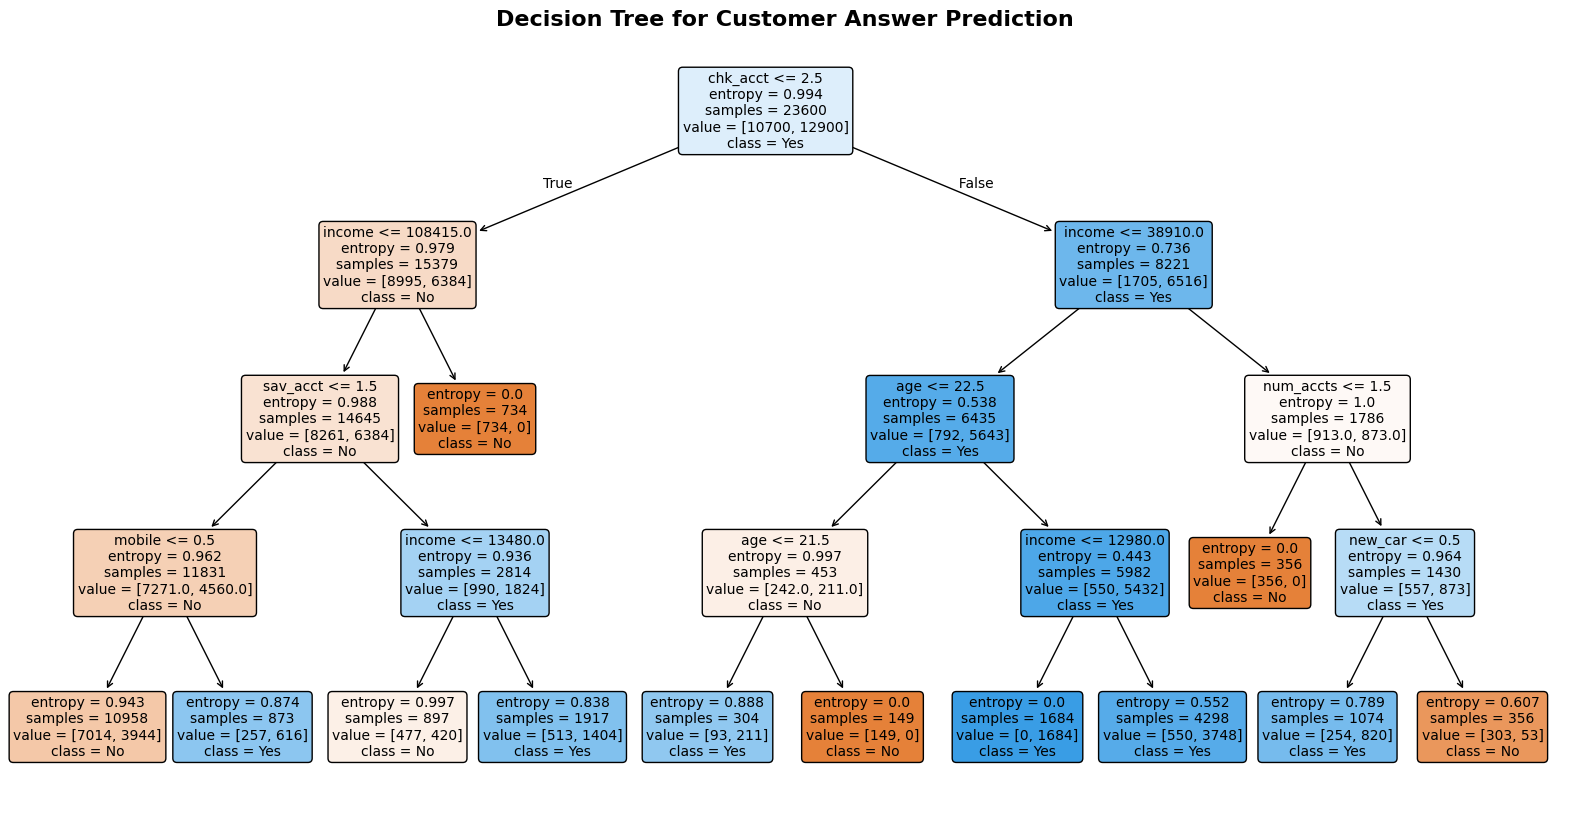

In [50]:
#display (visualize) the tree 🔧
# Display (visualize) the tree
plt.figure(figsize=(20, 10))
plot_tree(clf, feature_names=feature_cols, class_names=['No', 'Yes'],
          filled=True, rounded=True, fontsize=10)
plt.title("Decision Tree for Customer Answer Prediction", fontsize=16, fontweight='bold')
plt.show()

### 4.4: What is the accuracy?

This should be better than the base probability, or you have failed in your objective

In [51]:
#calculate the probability for your tree 🔧
# Calculate the probability for your tree
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"Model accuracy: {accuracy:.4f} or {accuracy*100:.2f}%")
print(f"Base probability: {base_probability:.4f} or {base_probability*100:.2f}%")
print(f"\nImprovement over base: {(accuracy - base_probability)*100:.2f} percentage points")

Model accuracy: 0.7295 or 72.95%
Base probability: 0.5466 or 54.66%

Improvement over base: 18.29 percentage points


### 4.5: Create a confusion matrix

This will show false positives, true positives, etc.

In [52]:
#create a basic confusion matrix 🔧
# Create a basic confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=['Did Not Answer', 'Answered']))

Confusion Matrix:
[[2230  445]
 [1151 2075]]

Classification Report:
                precision    recall  f1-score   support

Did Not Answer       0.66      0.83      0.74      2675
      Answered       0.82      0.64      0.72      3226

      accuracy                           0.73      5901
     macro avg       0.74      0.74      0.73      5901
  weighted avg       0.75      0.73      0.73      5901



Create a more visual, interpretable version of the matrix

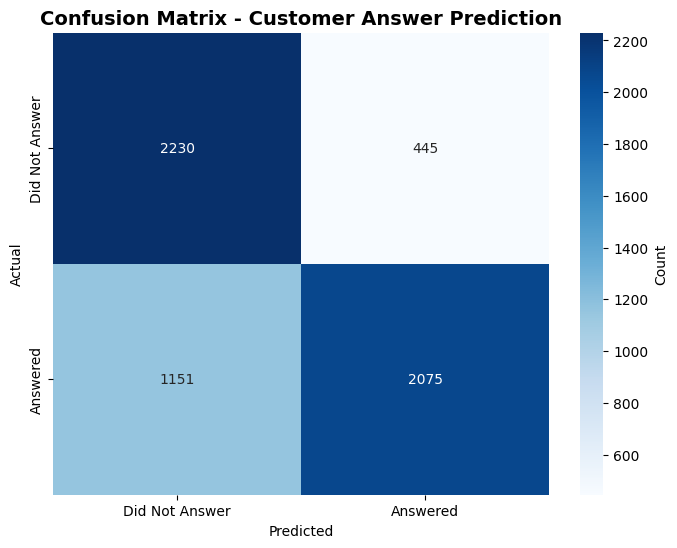

In [53]:
#Create a beautiful matrix; hint - try using Seaborn Heatmap 🔧
# Create a beautiful matrix; hint - try using Seaborn Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Did Not Answer', 'Answered'],
            yticklabels=['Did Not Answer', 'Answered'],
            cbar_kws={'label': 'Count'})
plt.title('Confusion Matrix - Customer Answer Prediction', fontsize=14, fontweight='bold')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# Step 5: Evaluate the Model

**Assumptions**

One of the simplifying assumptions we will make in this project is that all the customers who answer the phone will purchase a product. (This assumption is actually verified by the data.) To model "answered" in this case is therefore equivalent to modeling "purchased."

There are costs and benefits in this case. We will assume that customers purchase a product for 100 dollars. This was the average cost of AdviseInvest products, according to the Director of Sales.  Also, as we learned in the interview, the agent time to make the sale is worth 25 dollars. Profit would therefore be \$75 dollars for an answered call and a purchase. In sum:

**Benefit**: True positive. The customer is predicted to answer, does answer, and purchases a product for 100 dollars for a profit of 100 - 25 = 75.

**Cost**: False positive. The customer is predicted to answer, but does not answer, so there is a loss of 25. (We assume the agent cannot schedule another call at the last minute, or spends the entire time slot trying to make the call.)

When you create a calculation you can use:
- True answered * 75 -> These people purchased
- False answered * 25 -> You can't schedule another call

For this exercise, we propose that customers who are not predicted to answer will not be called, so there would be no benefits and no costs for them.  

### 5.1 Calculate the Profit Using the Model

In [54]:
# Write a calcuation for the profit from your model 🔧
# True Positives: predicted answer and did answer = $75 profit
# False Positives: predicted answer but didn't answer = -$25 loss
# True Negatives and False Negatives: no cost or benefit (not called)

tn, fp, fn, tp = cm.ravel()

model_profit = (tp * 75) + (fp * -25)

print(f"True Positives (Answered as predicted): {tp}")
print(f"False Positives (Didn't answer but predicted): {fp}")
print(f"True Negatives (Correctly predicted not to answer): {tn}")
print(f"False Negatives (Answered but predicted not to): {fn}")
print(f"\nProfit using the model: ${model_profit:,.2f}")

True Positives (Answered as predicted): 2075
False Positives (Didn't answer but predicted): 445
True Negatives (Correctly predicted not to answer): 2230
False Negatives (Answered but predicted not to): 1151

Profit using the model: $144,500.00


### 5.2 Compare to the Default Profit

How much profit (revenue - costs) could be expected if all customers are called? We can consider this a baseline case for profit since it does not require a model.

In other words, to calculate profit in this baseline scenario treat the customers who answer as true positives treat the customers who do not answer as false positives.

In [55]:
#Write a calculation for the overall profit without using the model (default) 🔧
# If we call everyone:
# - Those who answer = True Positives = $75
# - Those who don't answer = False Positives = -$25

total_answered = y_test.sum()
total_not_answered = len(y_test) - total_answered

default_profit = (total_answered * 75) + (total_not_answered * -25)

print(f"Customers who answered: {total_answered}")
print(f"Customers who didn't answer: {total_not_answered}")
print(f"Default profit (calling everyone): ${default_profit:,.2f}")
print(f"\nProfit improvement with model: ${model_profit - default_profit:,.2f}")
print(f"Percentage improvement: {((model_profit - default_profit) / abs(default_profit)) * 100:.2f}%")

Customers who answered: 3226
Customers who didn't answer: 2675
Default profit (calling everyone): $175,075.00

Profit improvement with model: $-30,575.00
Percentage improvement: -17.46%


### 5.3 Tune the Model
- Adjust the size or shape of the tree, then test the accuracy
- Keep changing these parameters until you end up with a tree with accuracy that is better than the initial model

In [57]:
# Create a new version of the tree with new parameters 🔧
clf_tuned = DecisionTreeClassifier(criterion='entropy', max_depth=6,
                                    min_samples_split=50, min_samples_leaf=20,
                                    random_state=42)
clf_tuned.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=6, min_samples_leaf=20,
                       min_samples_split=50, random_state=42)

In [58]:
# Calculate a new probability 🔧
y_pred_tuned = clf_tuned.predict(X_test)
accuracy_tuned = accuracy_score(y_test, y_pred_tuned)

print(f"Original model accuracy: {accuracy:.4f} or {accuracy*100:.2f}%")
print(f"Tuned model accuracy: {accuracy_tuned:.4f} or {accuracy_tuned*100:.2f}%")

# Calculate profit for tuned model
cm_tuned = confusion_matrix(y_test, y_pred_tuned)
tn_t, fp_t, fn_t, tp_t = cm_tuned.ravel()
tuned_profit = (tp_t * 75) + (fp_t * -25)

print(f"\nOriginal model profit: ${model_profit:,.2f}")
print(f"Tuned model profit: ${tuned_profit:,.2f}")
print(f"Profit difference: ${tuned_profit - model_profit:,.2f}")

Original model accuracy: 0.7295 or 72.95%
Tuned model accuracy: 0.7800 or 78.00%

Original model profit: $144,500.00
Tuned model profit: $154,600.00
Profit difference: $10,100.00


### 5.4 Apply the Model to New Customers
- Import the "adviseinvest_new_customer_data.csv" file
- Using the tree model, predict each customer for the target variable  by feeding the new customer data into the model

In [63]:
#Import new customer data into a new data frame 🔧
df_new = pd.read_csv('sample_data/adviseinvest_historical_data.csv')
df_new = df_new[df_new['female'] != 'M']
df_new['female'] = df_new['female'].astype(int)
print("New customer data loaded:")
print(f"Number of new customers: {len(df_new)}")
df_new.head()

New customer data loaded:
Number of new customers: 29503


,answered,income,female,age,job,num_dependents,rent,own_res,new_car,chk_acct,sav_acct,num_accts,mobile,product
0,1,13520,0,23,0,1,1,0,0.0,0,2,0,1,2
1,0,14780,0,22,2,1,0,1,0.0,3,0,3,0,0
2,1,37570,0,62,2,1,0,0,1.0,3,0,4,0,4
3,0,12450,0,33,2,1,0,1,0.0,1,0,2,0,0
4,0,12400,0,48,1,2,0,0,1.0,2,1,4,0,0


In [64]:
#Predict the number of customers who will be yes/no for the target variable 🔧
# Predict the number of customers who will be yes/no for the target variable
# Ensure the new data has the same features in the same order
X_new = df_new[feature_cols]

# Make predictions using the best model (choose tuned or original based on performance)
predictions = clf_tuned.predict(X_new)

# Add predictions to the dataframe
df_new['predicted_answer'] = predictions
df_new['predicted_answer_label'] = df_new['predicted_answer'].map({0: 'No', 1: 'Yes'})

# Summary of predictions
print("\nPrediction Summary:")
print(df_new['predicted_answer_label'].value_counts())
print(f"\nPercentage predicted to answer: {(predictions.sum() / len(predictions)) * 100:.2f}%")

# Display sample predictions
print("\nSample predictions:")
print(df_new[['income', 'age', 'mobile', 'predicted_answer_label']].head(10))


Prediction Summary:
predicted_answer_label
No     17726
Yes    11777
Name: count, dtype: int64

Percentage predicted to answer: 39.92%

Sample predictions:
   income  age  mobile predicted_answer_label
0   13520   23       1                    Yes
1   14780   22       0                     No
2   37570   62       0                    Yes
3   12450   33       0                     No
4   12400   48       0                     No
5   14030   28       0                     No
6    9320   24       0                    Yes
7   11750   68       0                     No
8   69670   36       0                     No
9    3380   52       0                    Yes


# Step 6: Conclusion
### 6.1: Did we improve our profit using the model?  

Write your conclusion notes below:  🔧

### 6.2: How could the model be utilized by the business?

Write your recommendations below:  🔧

## Submission Instructions
✅ Checklist:
- All code cells run without error
- All markdown responses are complete
- Submit on Canvas as instructed

In [ ]:
!jupyter nbconvert --to html "assignment_10_LastnameFirstname.ipynb"